# Import liabraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor # to check for no multicolinr=earity
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Problem statement

## Data gathering

In [90]:
df = pd.read_csv(r"C:\Users\parid\Downloads\healthcare_dataset.csv")

In [91]:
df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Billing Amount,Room Number,Admission Type,Discharge Date,Test Results
0,30,Male,B-,Cancer,31-01-2024,18856.281310,328,Urgent,02-02-2024,Normal
1,62,Male,A+,Obesity,20-08-2019,33643.327290,265,Emergency,26-08-2019,Inconclusive
2,76,Female,A-,Obesity,22-09-2022,27955.096080,205,Emergency,07-10-2022,Normal
3,28,Female,O+,Diabetes,18-11-2020,37909.782410,450,Elective,18-12-2020,Abnormal
4,43,Female,AB+,Cancer,19-09-2022,14238.317810,458,Urgent,09-10-2022,Abnormal
...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,16-08-2020,2650.714952,417,Elective,15-09-2020,Abnormal
55496,61,Female,AB-,Obesity,23-01-2020,31457.797310,316,Elective,01-02-2020,Normal
55497,38,Female,B+,Hypertension,13-07-2020,27620.764720,347,Urgent,10-08-2020,Abnormal
55498,43,Male,O-,Arthritis,25-05-2019,32451.092360,321,Elective,31-05-2019,Abnormal


In [92]:
df.drop(labels="Date of Admission", axis=1, inplace=True)
df

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Discharge Date,Test Results
0,30,Male,B-,Cancer,18856.281310,328,Urgent,02-02-2024,Normal
1,62,Male,A+,Obesity,33643.327290,265,Emergency,26-08-2019,Inconclusive
2,76,Female,A-,Obesity,27955.096080,205,Emergency,07-10-2022,Normal
3,28,Female,O+,Diabetes,37909.782410,450,Elective,18-12-2020,Abnormal
4,43,Female,AB+,Cancer,14238.317810,458,Urgent,09-10-2022,Abnormal
...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2650.714952,417,Elective,15-09-2020,Abnormal
55496,61,Female,AB-,Obesity,31457.797310,316,Elective,01-02-2020,Normal
55497,38,Female,B+,Hypertension,27620.764720,347,Urgent,10-08-2020,Abnormal
55498,43,Male,O-,Arthritis,32451.092360,321,Elective,31-05-2019,Abnormal


In [93]:
df.drop(labels="Discharge Date", axis=1, inplace=True)
df

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Test Results
0,30,Male,B-,Cancer,18856.281310,328,Urgent,Normal
1,62,Male,A+,Obesity,33643.327290,265,Emergency,Inconclusive
2,76,Female,A-,Obesity,27955.096080,205,Emergency,Normal
3,28,Female,O+,Diabetes,37909.782410,450,Elective,Abnormal
4,43,Female,AB+,Cancer,14238.317810,458,Urgent,Abnormal
...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2650.714952,417,Elective,Abnormal
55496,61,Female,AB-,Obesity,31457.797310,316,Elective,Normal
55497,38,Female,B+,Hypertension,27620.764720,347,Urgent,Abnormal
55498,43,Male,O-,Arthritis,32451.092360,321,Elective,Abnormal


#  : EDA (Exploratory Data Analysis)

In [94]:
# check  for basic info

df.shape

(55500, 8)

In [95]:
df.size

444000

In [96]:
df.columns


Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount',
       'Room Number', 'Admission Type', 'Test Results'],
      dtype='object')

In [97]:
# information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                55500 non-null  int64  
 1   Gender             55500 non-null  object 
 2   Blood Type         55500 non-null  object 
 3   Medical Condition  55500 non-null  object 
 4   Billing Amount     55500 non-null  float64
 5   Room Number        55500 non-null  int64  
 6   Admission Type     55500 non-null  object 
 7   Test Results       55500 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.4+ MB


In [98]:
df["Gender"].replace({"Female":0,"Male":1}, inplace = True)
df

C:\Users\parid\AppData\Local\Temp\ipykernel_3232\3285451669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({"Female":0,"Male":1}, inplace = True)
C:\Users\parid\AppData\Local\Temp\ipykernel_3232\3285451669.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].rep

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Test Results
0,30,1,B-,Cancer,18856.281310,328,Urgent,Normal
1,62,1,A+,Obesity,33643.327290,265,Emergency,Inconclusive
2,76,0,A-,Obesity,27955.096080,205,Emergency,Normal
3,28,0,O+,Diabetes,37909.782410,450,Elective,Abnormal
4,43,0,AB+,Cancer,14238.317810,458,Urgent,Abnormal
...,...,...,...,...,...,...,...,...
55495,42,0,O+,Asthma,2650.714952,417,Elective,Abnormal
55496,61,0,AB-,Obesity,31457.797310,316,Elective,Normal
55497,38,0,B+,Hypertension,27620.764720,347,Urgent,Abnormal
55498,43,1,O-,Arthritis,32451.092360,321,Elective,Abnormal


In [99]:
df["Blood Type"].replace({"A+":0, "B+":1,"AB+":2,"A-":3,"B-":4,"AB-":5,"O+":6,"O-":7}, inplace = True)
df

C:\Users\parid\AppData\Local\Temp\ipykernel_3232\1814160201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Blood Type"].replace({"A+":0, "B+":1,"AB+":2,"A-":3,"B-":4,"AB-":5,"O+":6,"O-":7}, inplace = True)
C:\Users\parid\AppData\Local\Temp\ipykernel_3232\1814160201.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Test Results
0,30,1,4,Cancer,18856.281310,328,Urgent,Normal
1,62,1,0,Obesity,33643.327290,265,Emergency,Inconclusive
2,76,0,3,Obesity,27955.096080,205,Emergency,Normal
3,28,0,6,Diabetes,37909.782410,450,Elective,Abnormal
4,43,0,2,Cancer,14238.317810,458,Urgent,Abnormal
...,...,...,...,...,...,...,...,...
55495,42,0,6,Asthma,2650.714952,417,Elective,Abnormal
55496,61,0,5,Obesity,31457.797310,316,Elective,Normal
55497,38,0,1,Hypertension,27620.764720,347,Urgent,Abnormal
55498,43,1,7,Arthritis,32451.092360,321,Elective,Abnormal


In [100]:
df["Medical Condition"].replace({"Cancer":0, "Obesity":1,"Diabetes":2,"Asthma":3,"Hypertension":4,"Arthritis":5},inplace = True)
df

C:\Users\parid\AppData\Local\Temp\ipykernel_3232\3931118524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Medical Condition"].replace({"Cancer":0, "Obesity":1,"Diabetes":2,"Asthma":3,"Hypertension":4,"Arthritis":5},inplace = True)
C:\Users\parid\AppData\Local\Temp\ipykernel_3232\3931118524.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Test Results
0,30,1,4,0,18856.281310,328,Urgent,Normal
1,62,1,0,1,33643.327290,265,Emergency,Inconclusive
2,76,0,3,1,27955.096080,205,Emergency,Normal
3,28,0,6,2,37909.782410,450,Elective,Abnormal
4,43,0,2,0,14238.317810,458,Urgent,Abnormal
...,...,...,...,...,...,...,...,...
55495,42,0,6,3,2650.714952,417,Elective,Abnormal
55496,61,0,5,1,31457.797310,316,Elective,Normal
55497,38,0,1,4,27620.764720,347,Urgent,Abnormal
55498,43,1,7,5,32451.092360,321,Elective,Abnormal


In [101]:
df["Admission Type"].replace({"Urgent":0, "Emergency":1,"Elective":2}, inplace = True)
df

C:\Users\parid\AppData\Local\Temp\ipykernel_3232\2574574444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Admission Type"].replace({"Urgent":0, "Emergency":1,"Elective":2}, inplace = True)
C:\Users\parid\AppData\Local\Temp\ipykernel_3232\2574574444.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Test Results
0,30,1,4,0,18856.281310,328,0,Normal
1,62,1,0,1,33643.327290,265,1,Inconclusive
2,76,0,3,1,27955.096080,205,1,Normal
3,28,0,6,2,37909.782410,450,2,Abnormal
4,43,0,2,0,14238.317810,458,0,Abnormal
...,...,...,...,...,...,...,...,...
55495,42,0,6,3,2650.714952,417,2,Abnormal
55496,61,0,5,1,31457.797310,316,2,Normal
55497,38,0,1,4,27620.764720,347,0,Abnormal
55498,43,1,7,5,32451.092360,321,2,Abnormal


In [102]:
df["Test Results"].replace({"Normal":0, "Abnormal":1,"Inconclusive":2}, inplace = True)
df

C:\Users\parid\AppData\Local\Temp\ipykernel_3232\2500290264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Test Results"].replace({"Normal":0, "Abnormal":1,"Inconclusive":2}, inplace = True)
C:\Users\parid\AppData\Local\Temp\ipykernel_3232\2500290264.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Test Results
0,30,1,4,0,18856.281310,328,0,0
1,62,1,0,1,33643.327290,265,1,2
2,76,0,3,1,27955.096080,205,1,0
3,28,0,6,2,37909.782410,450,2,1
4,43,0,2,0,14238.317810,458,0,1
...,...,...,...,...,...,...,...,...
55495,42,0,6,3,2650.714952,417,2,1
55496,61,0,5,1,31457.797310,316,2,0
55497,38,0,1,4,27620.764720,347,0,1
55498,43,1,7,5,32451.092360,321,2,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                55500 non-null  int64  
 1   Gender             55500 non-null  int64  
 2   Blood Type         55500 non-null  int64  
 3   Medical Condition  55500 non-null  int64  
 4   Billing Amount     55500 non-null  float64
 5   Room Number        55500 non-null  int64  
 6   Admission Type     55500 non-null  int64  
 7   Test Results       55500 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.4 MB


In [104]:
# statistical information

df.describe()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Test Results
count,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000
mean,51.539459,0.500432,3.493477,2.502955,25539.316097,301.134829,1.001423,0.997099
std,19.602454,0.500004,2.289144,1.708692,14211.454431,115.243069,0.819048,0.815096
min,13.000000,0.000000,0.000000,0.000000,-2008.492140,101.000000,0.000000,0.000000
25%,35.000000,0.000000,1.000000,1.000000,13241.224655,202.000000,0.000000,0.000000
50%,52.000000,1.000000,3.000000,2.000000,25538.069380,302.000000,1.000000,1.000000
75%,68.000000,1.000000,5.000000,4.000000,37820.508432,401.000000,2.000000,2.000000
max,89.000000,1.000000,7.000000,5.000000,52764.276740,500.000000,2.000000,2.000000


In [105]:
# check for missing values

df.isna().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Billing Amount       0
Room Number          0
Admission Type       0
Test Results         0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

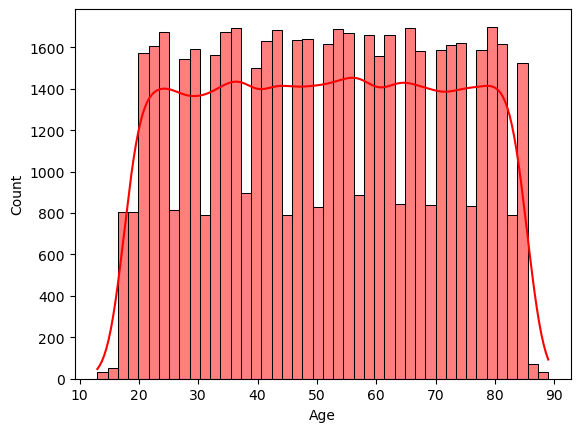

In [106]:
# age column : univariate analysis


sns.histplot(df["Age"], kde= True, color = "red")

<Axes: ylabel='Age'>

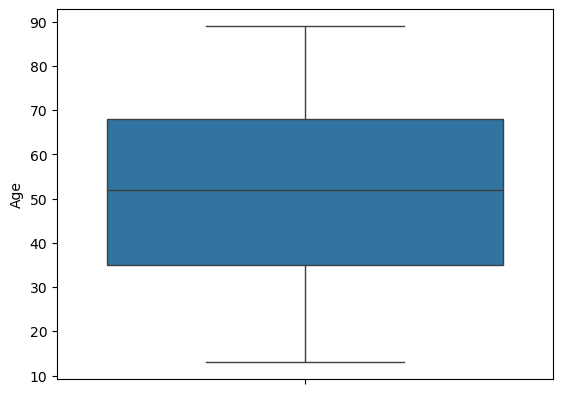

In [107]:
# check for the outliers - extreme datapoints

sns.boxplot(df["Age"])

In [108]:
df["Gender"].value_counts()

Gender
1    27774
0    27726
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

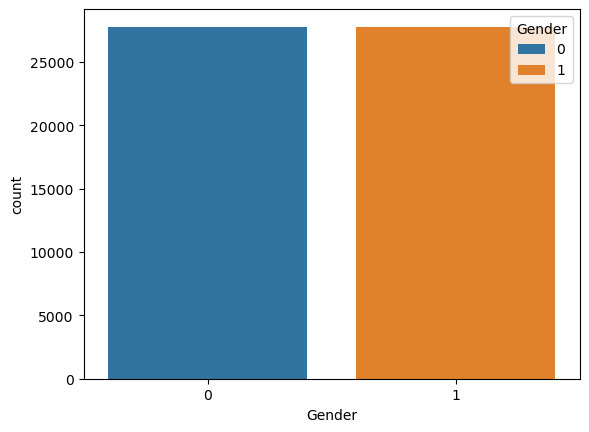

In [109]:
sns.countplot(x = df["Gender"], hue=df["Gender"])

<Axes: xlabel='Billing Amount', ylabel='Count'>

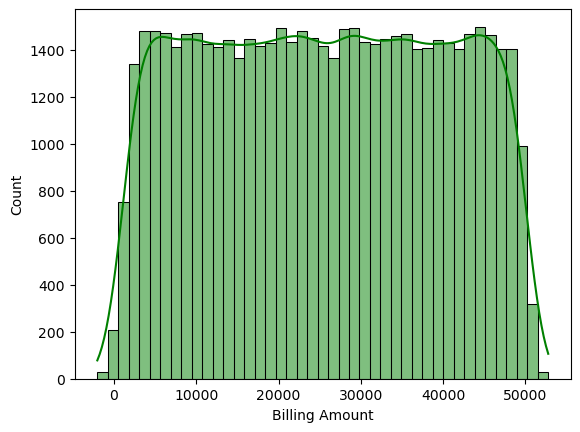

In [110]:
# univariate analysis
sns.histplot(df["Billing Amount"], color = "green", kde = True)

<Axes: ylabel='Billing Amount'>

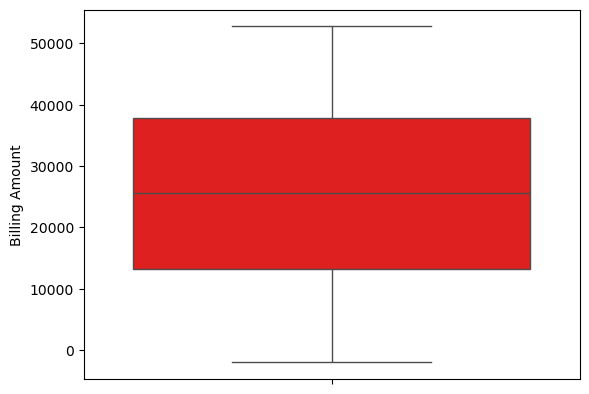

In [111]:
sns.boxplot(df["Billing Amount"], color = "red")

In [112]:
df["Medical Condition"].value_counts()

Medical Condition
5    9308
2    9304
4    9245
1    9231
0    9227
3    9185
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Medical Condition'>

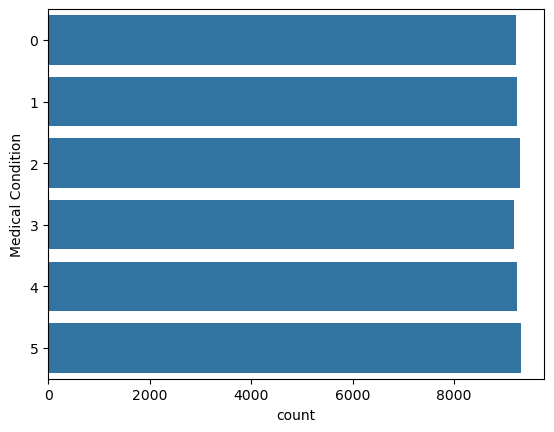

In [113]:
sns.countplot(y = df["Medical Condition"])

In [114]:
df.corr()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Test Results
Age,1.000000,-0.002002,-0.002985,0.003876,-0.003832,-0.000720,-0.004775,0.007546
Gender,-0.002002,1.000000,-0.004043,-0.001351,0.004827,-0.006332,-0.009967,-0.005501
Blood Type,-0.002985,-0.004043,1.000000,0.006896,0.001797,0.003972,0.008390,-0.007924
Medical Condition,0.003876,-0.001351,0.006896,1.000000,0.002548,-0.003038,0.001626,0.000284
Billing Amount,-0.003832,0.004827,0.001797,0.002548,1.000000,-0.002943,0.002448,0.004790
Room Number,-0.000720,-0.006332,0.003972,-0.003038,-0.002943,1.000000,0.004339,-0.003807
Admission Type,-0.004775,-0.009967,0.008390,0.001626,0.002448,0.004339,1.000000,-0.003206
Test Results,0.007546,-0.005501,-0.007924,0.000284,0.004790,-0.003807,-0.003206,1.000000


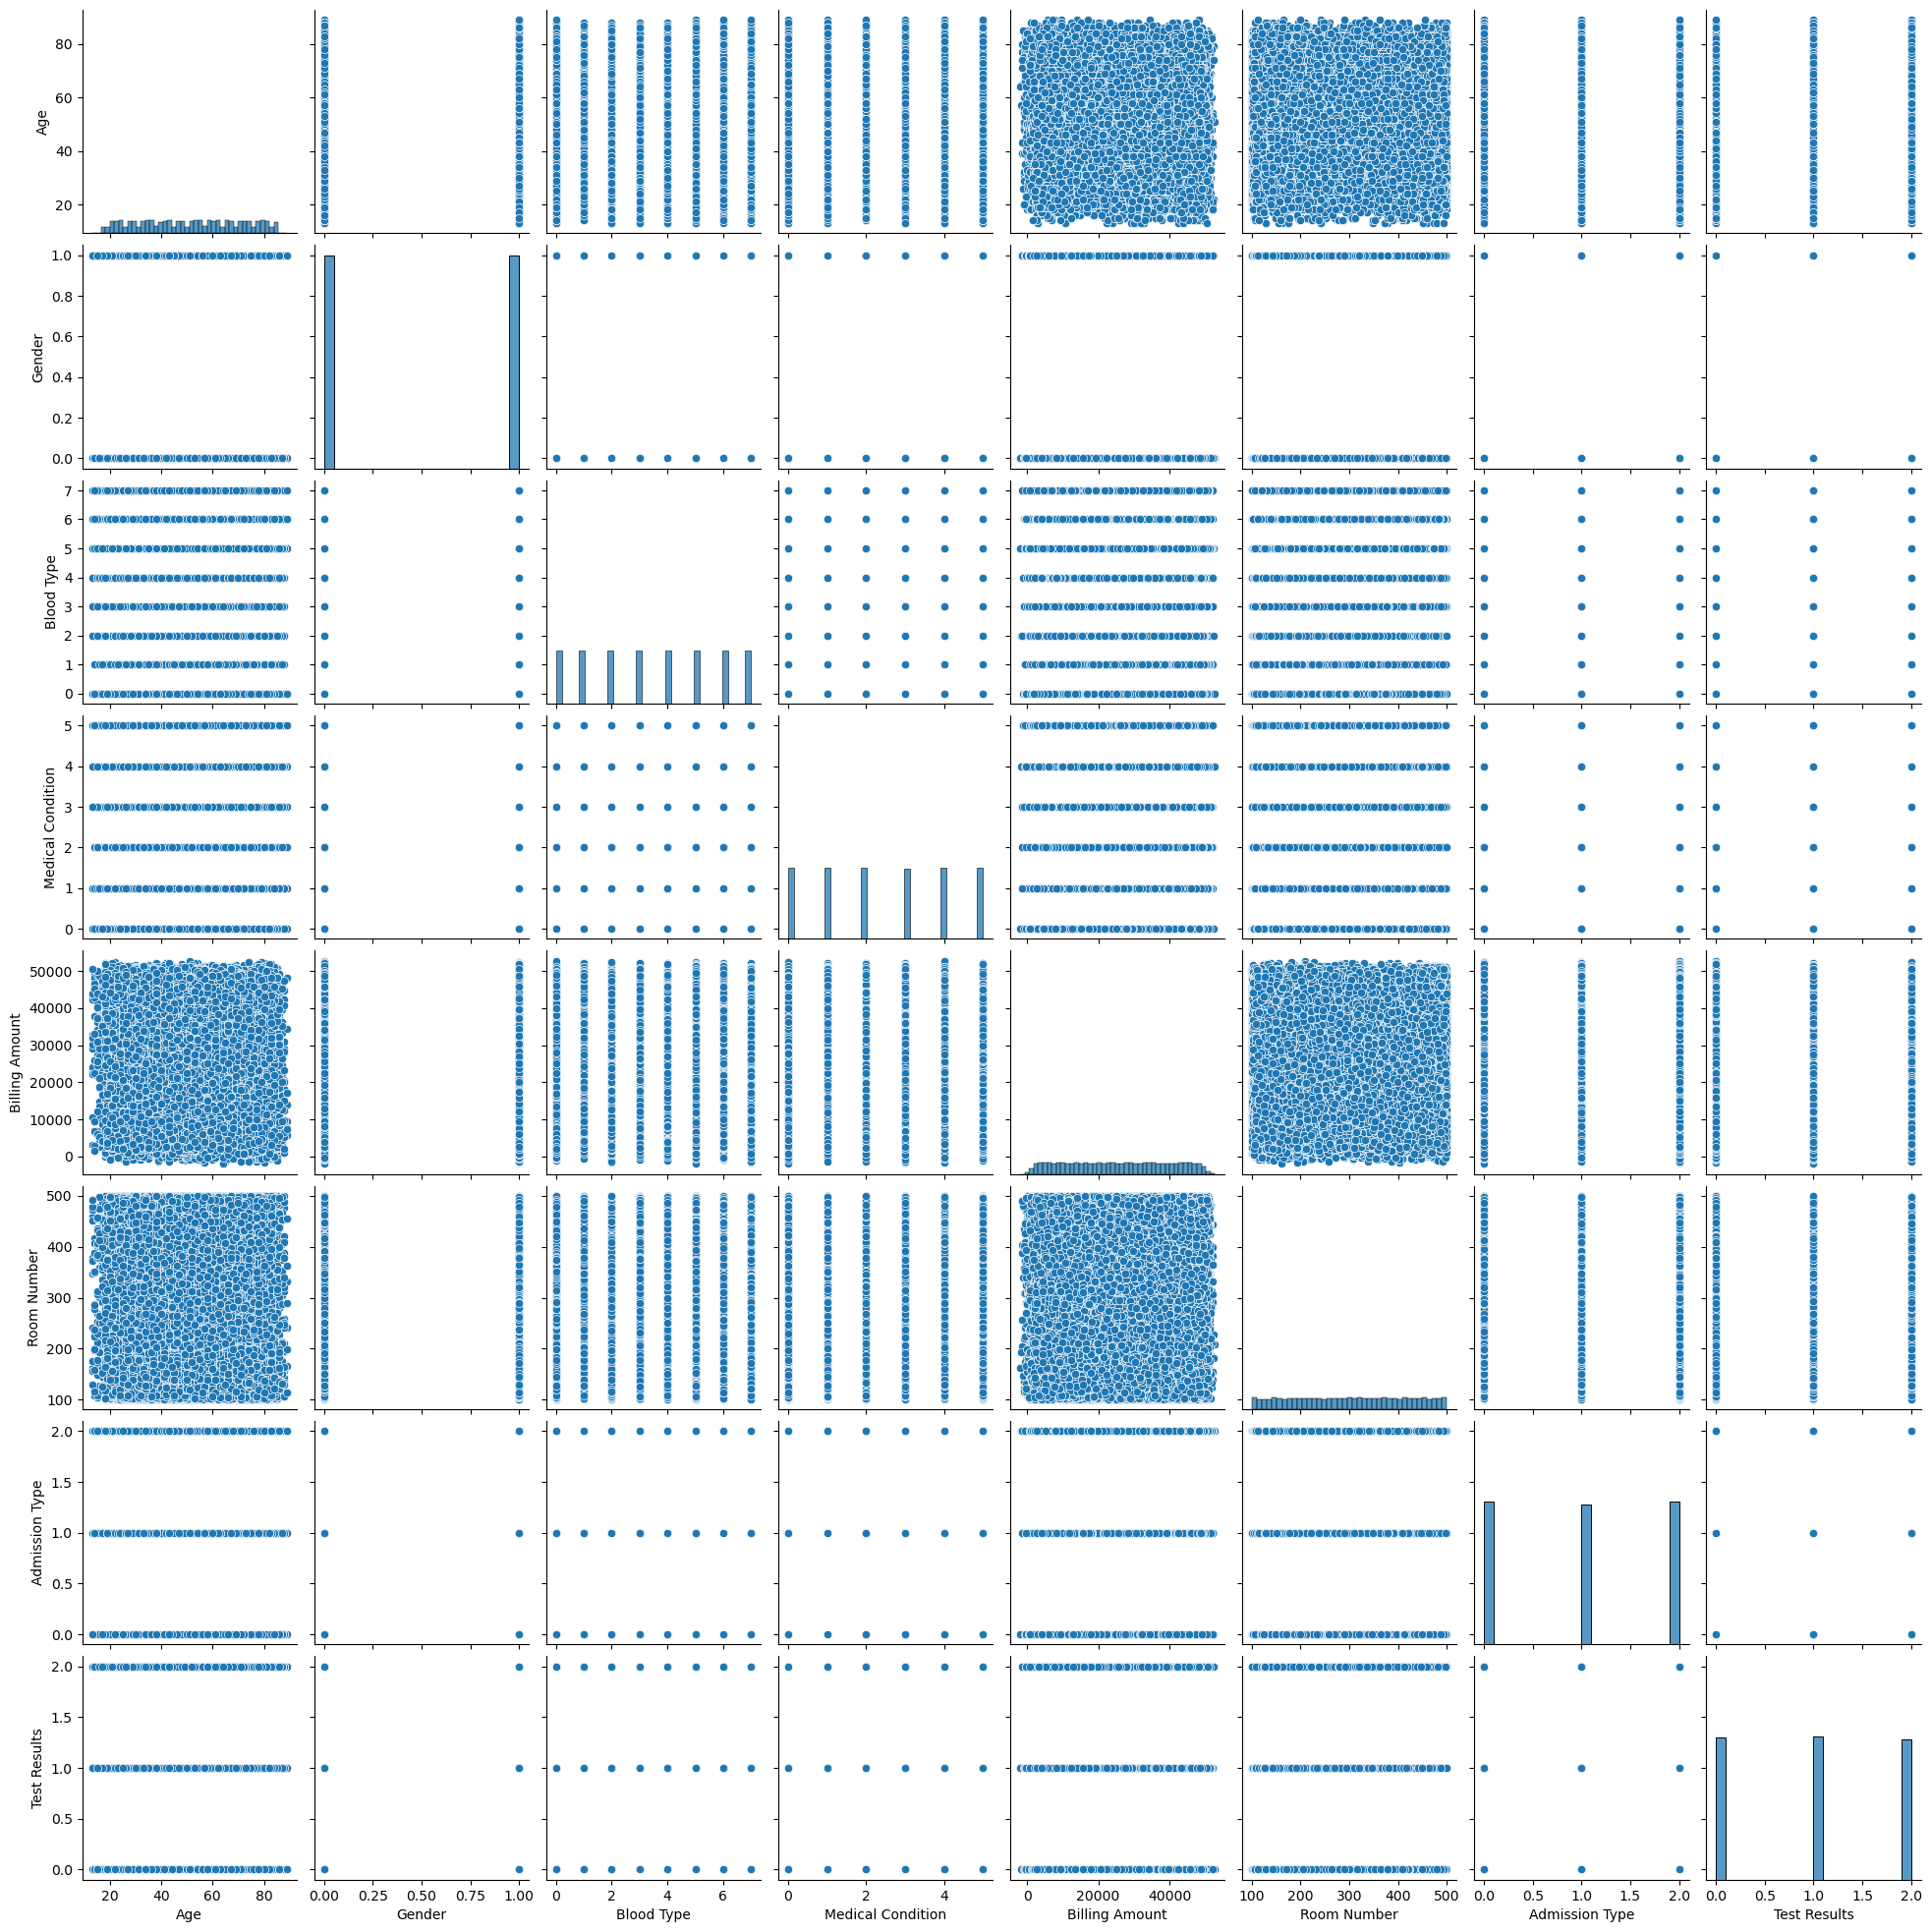

In [115]:
sns.pairplot(df)

<Axes: >

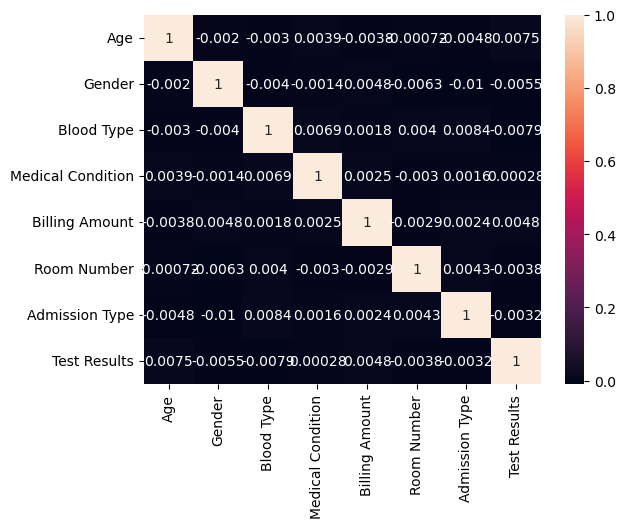

In [116]:
sns.heatmap(df.corr() ,annot=True)

<Axes: xlabel='Gender', ylabel='Medical Condition'>

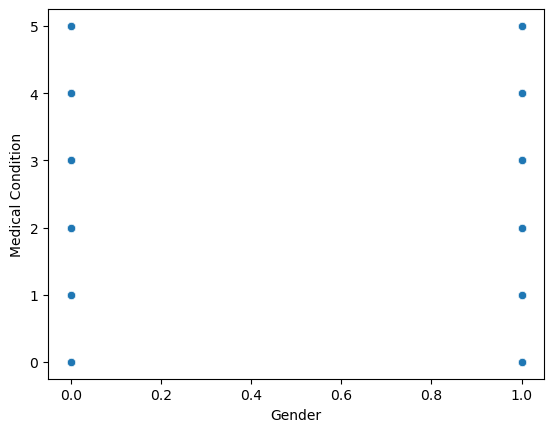

In [117]:
sns.scatterplot(x = df["Gender"], y = df["Medical Condition"])


## Assumption 1 : Linearity

In [118]:
df.corr()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Test Results
Age,1.000000,-0.002002,-0.002985,0.003876,-0.003832,-0.000720,-0.004775,0.007546
Gender,-0.002002,1.000000,-0.004043,-0.001351,0.004827,-0.006332,-0.009967,-0.005501
Blood Type,-0.002985,-0.004043,1.000000,0.006896,0.001797,0.003972,0.008390,-0.007924
Medical Condition,0.003876,-0.001351,0.006896,1.000000,0.002548,-0.003038,0.001626,0.000284
Billing Amount,-0.003832,0.004827,0.001797,0.002548,1.000000,-0.002943,0.002448,0.004790
Room Number,-0.000720,-0.006332,0.003972,-0.003038,-0.002943,1.000000,0.004339,-0.003807
Admission Type,-0.004775,-0.009967,0.008390,0.001626,0.002448,0.004339,1.000000,-0.003206
Test Results,0.007546,-0.005501,-0.007924,0.000284,0.004790,-0.003807,-0.003206,1.000000


<Axes: >

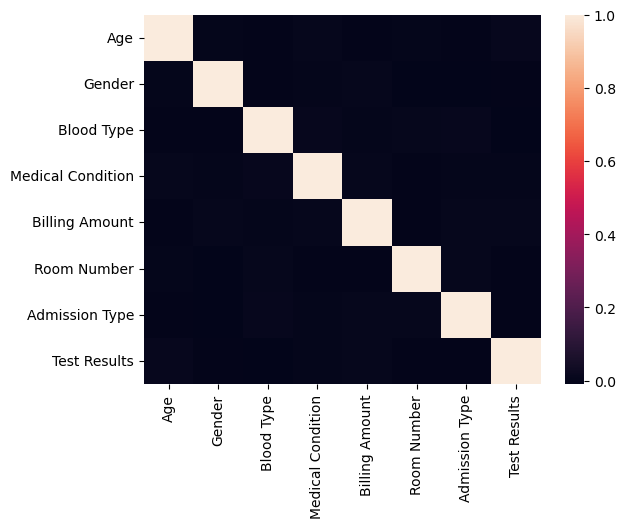

In [119]:
sns.heatmap(df.corr())

<Axes: >

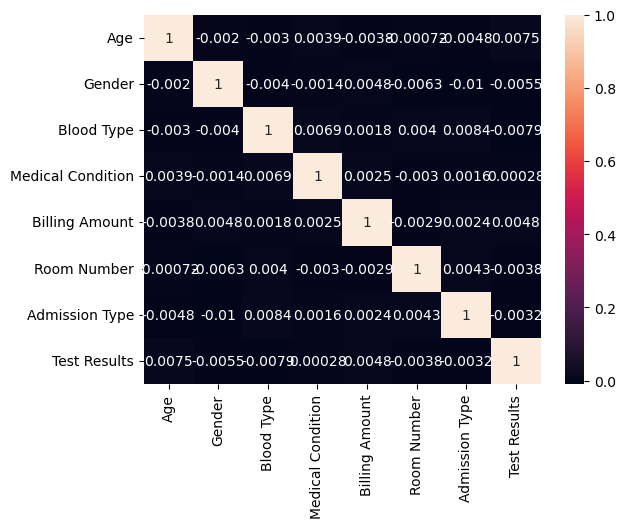

In [120]:
sns.heatmap(df.corr(), annot = True)

<Axes: >

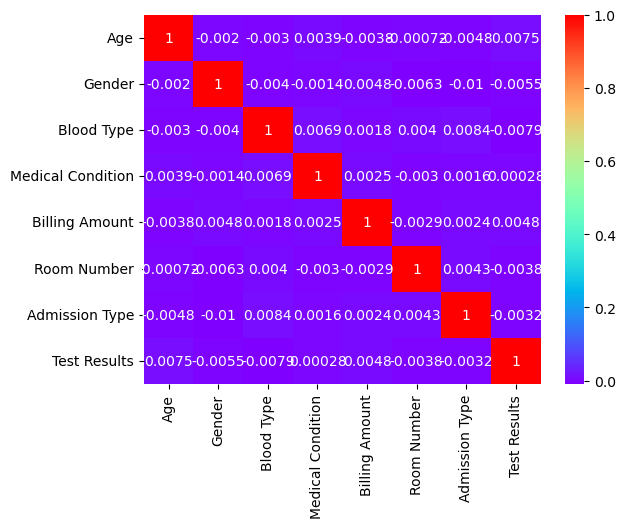

In [121]:
sns.heatmap(df.corr(), annot=True, cmap= "rainbow")

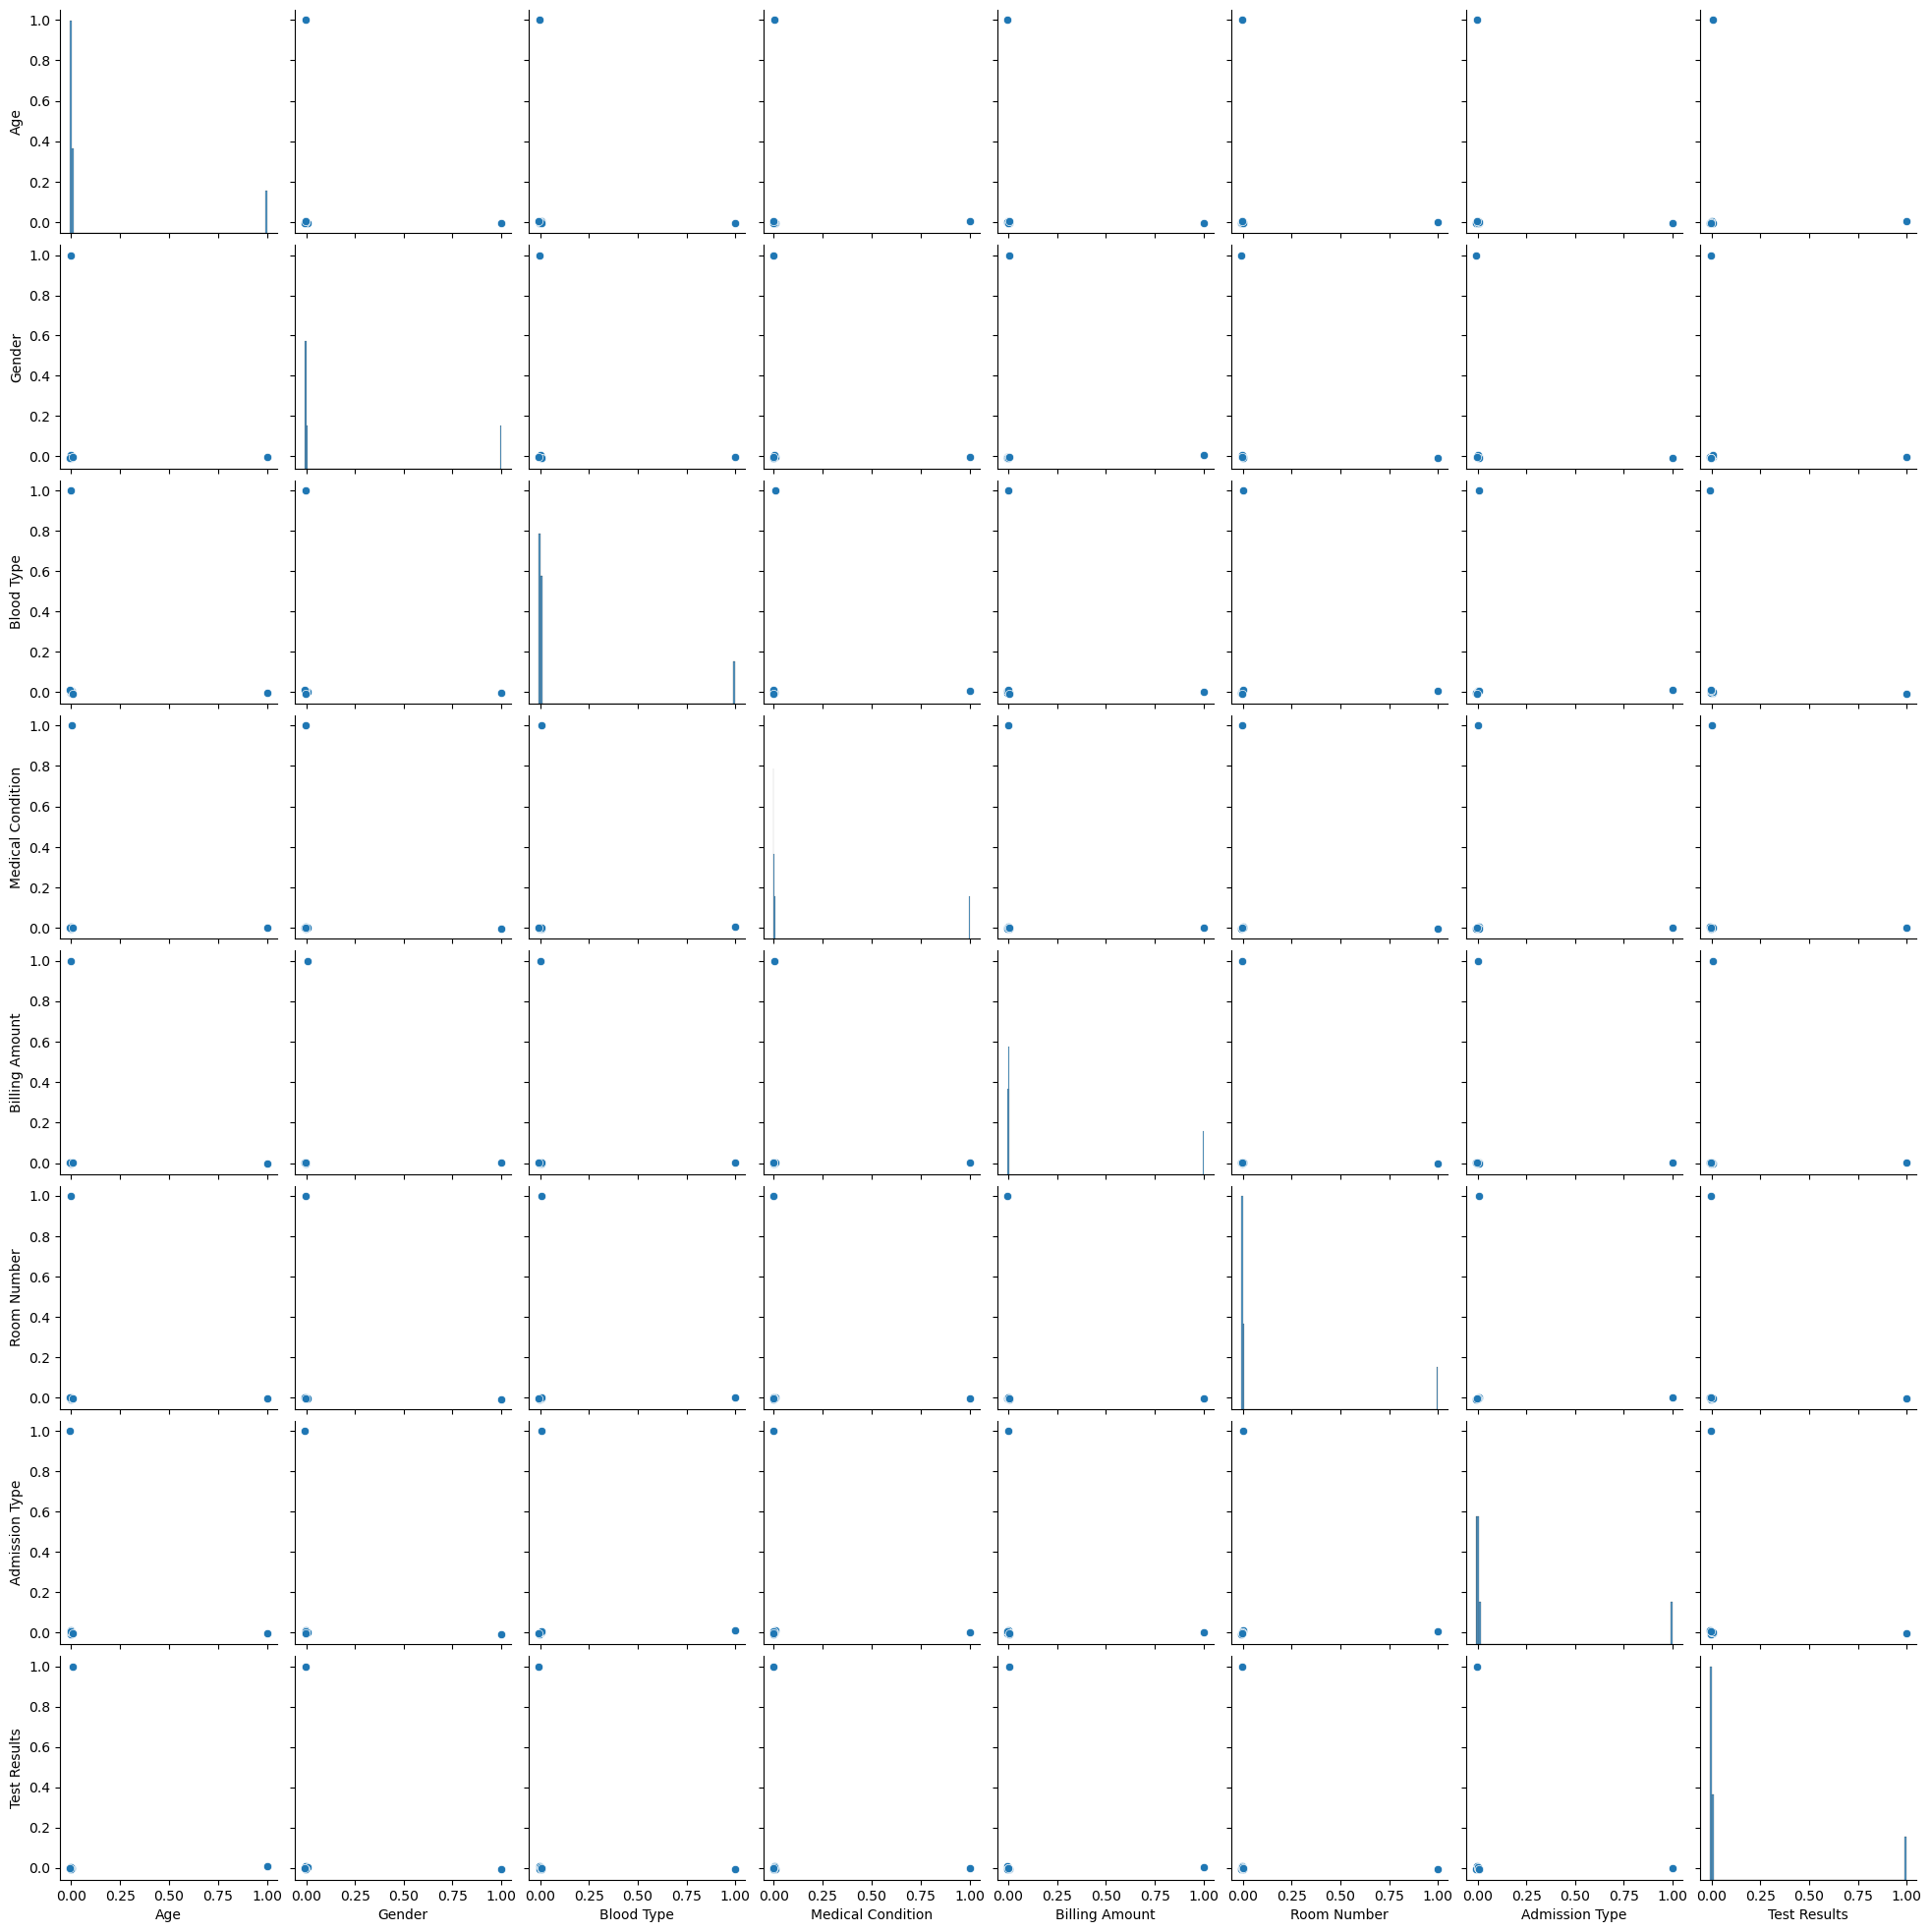

In [34]:
sns.pairplot(df.corr())

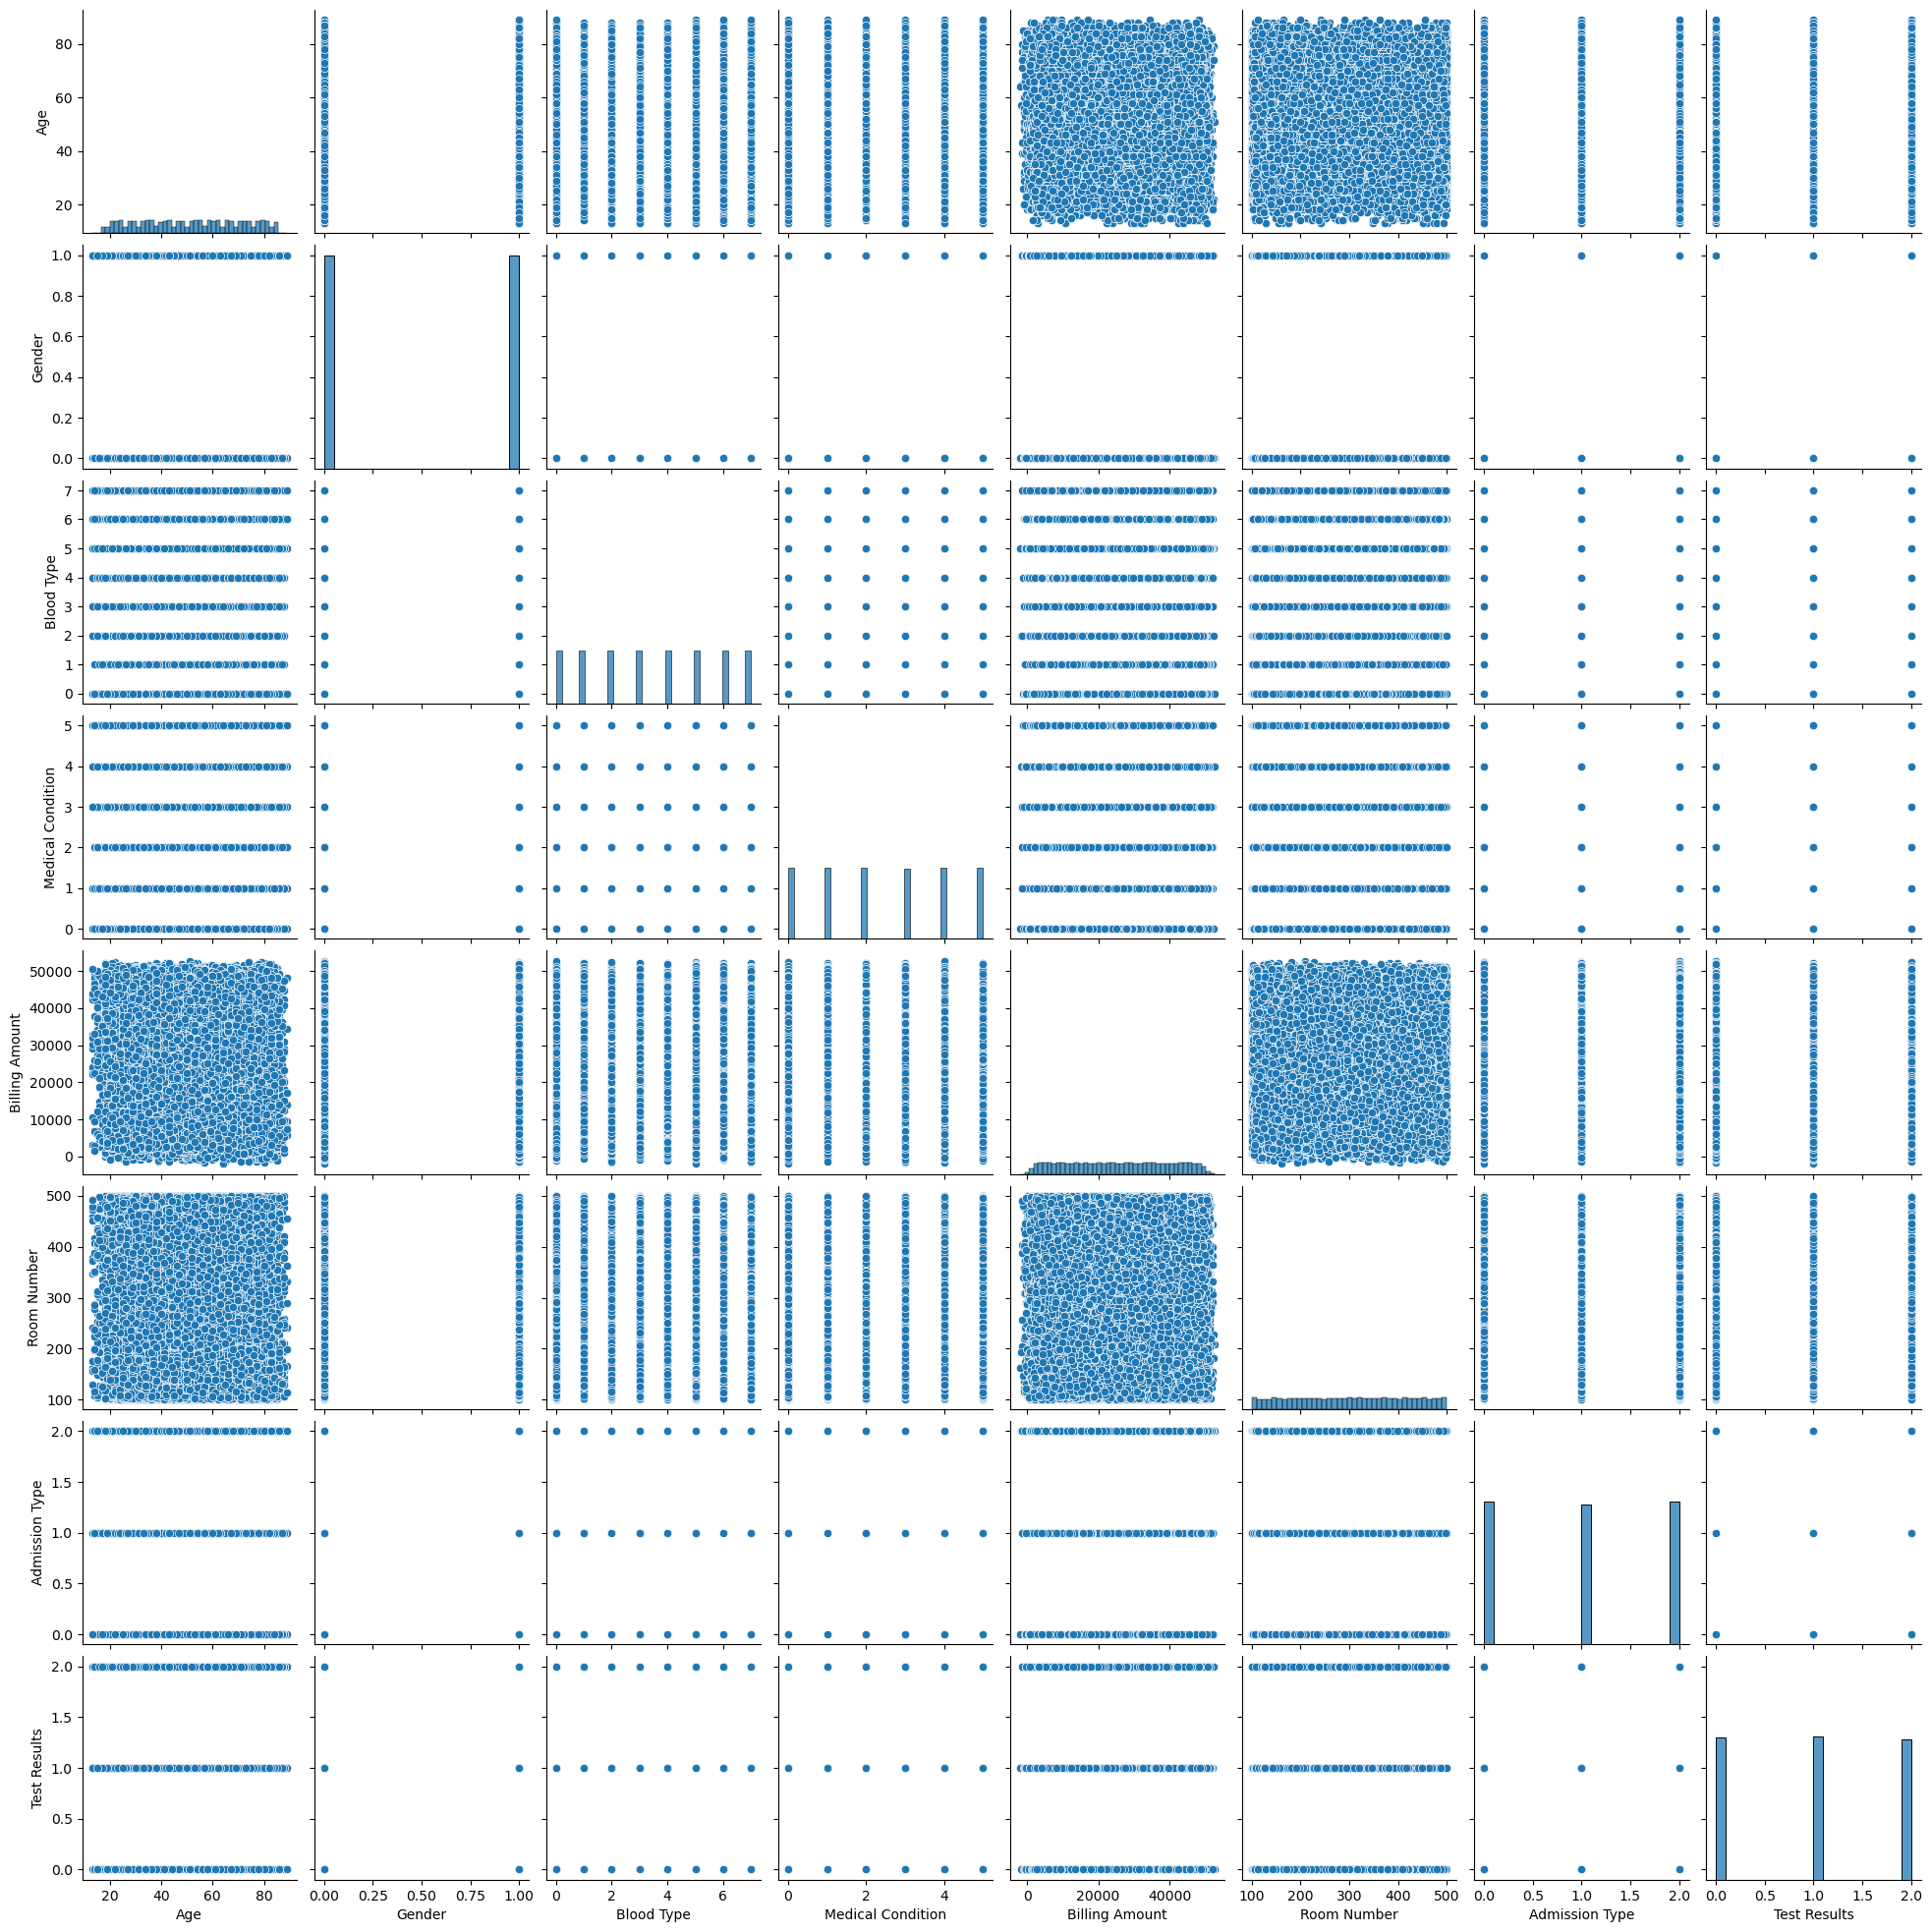

In [35]:
sns.pairplot(df)

### Assumption2 : No multicolinearity

In [122]:
df1 = df.iloc[:, [0,1,2,3,5,6,7]]
df1

,Age,Gender,Blood Type,Medical Condition,Room Number,Admission Type,Test Results
0,30,1,4,0,328,0,0
1,62,1,0,1,265,1,2
2,76,0,3,1,205,1,0
3,28,0,6,2,450,2,1
4,43,0,2,0,458,0,1
...,...,...,...,...,...,...,...
55495,42,0,6,3,417,2,1
55496,61,0,5,1,316,2,0
55497,38,0,1,4,347,0,1
55498,43,1,7,5,321,2,1


In [123]:
vif_df = pd.DataFrame()
vif_df["Features"] = df1.columns

vif_df

,Features
0,Age
1,Gender
2,Blood Type
3,Medical Condition
4,Room Number
5,Admission Type
6,Test Results


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                55500 non-null  int64
 1   Gender             55500 non-null  int64
 2   Blood Type         55500 non-null  int64
 3   Medical Condition  55500 non-null  int64
 4   Room Number        55500 non-null  int64
 5   Admission Type     55500 non-null  int64
 6   Test Results       55500 non-null  int64
dtypes: int64(7)
memory usage: 3.0 MB


In [124]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
   
vif_df["VIF"] = vif_list

vif_df

,Features,VIF
0,Age,5.562531
1,Gender,1.907248
2,Blood Type,3.000187
3,Medical Condition,2.861119
4,Room Number,5.519196
5,Admission Type,2.334971
6,Test Results,2.333228


In [134]:
x = df1
y = df["Billing Amount"]

In [135]:
x

,Age,Gender,Blood Type,Medical Condition,Room Number,Admission Type,Test Results
0,30,1,4,0,328,0,0
1,62,1,0,1,265,1,2
2,76,0,3,1,205,1,0
3,28,0,6,2,450,2,1
4,43,0,2,0,458,0,1
...,...,...,...,...,...,...,...
55495,42,0,6,3,417,2,1
55496,61,0,5,1,316,2,0
55497,38,0,1,4,347,0,1
55498,43,1,7,5,321,2,1


In [126]:
y

0        18856.281310
1        33643.327290
2        27955.096080
3        37909.782410
4        14238.317810
             ...     
55495     2650.714952
55496    31457.797310
55497    27620.764720
55498    32451.092360
55499     4010.134172
Name: Billing Amount, Length: 55500, dtype: float64

## Train test split

In [136]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=10)

In [137]:
xtrain.shape

(44400, 7)

In [138]:
xtrain.head()

,Age,Gender,Blood Type,Medical Condition,Room Number,Admission Type,Test Results
52709,40,1,0,4,343,1,1
49755,69,1,5,0,176,1,1
33294,43,0,3,3,196,1,2
50430,47,1,2,2,427,0,2
23514,75,1,0,4,184,0,1


In [139]:
ytrain.shape

(44400,)

ytrain.unique()

In [140]:
ytrain.head()

52709    14300.94223
49755    15641.64232
33294    33331.27203
50430    48234.05955
23514    46975.20873
Name: Billing Amount, dtype: float64

In [141]:
xtest.shape

(11100, 7)

In [142]:
ytest.shape

(11100,)

## : Model Training

### Algorithm1 :  Linear Regression

In [143]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [144]:
lin_reg_model = lin_reg.fit(xtrain,ytrain)  # linear regression algorithm works, finds best fit line, SGD algo works(optimal values f m, c, mse)
lin_reg_model

LinearRegression()

In [145]:
ytrain.head() #yactual

52709    14300.94223
49755    15641.64232
33294    33331.27203
50430    48234.05955
23514    46975.20873
Name: Billing Amount, dtype: float64

In [146]:
ytrain_predict = lin_reg_model.predict(xtrain)
ytrain_predict #ypredicted

array([25735.17908131, 25571.08738639, 25752.28005187, ...,
       25481.85917174, 25355.47947005, 25382.51332347])

### Assumption 3 : Normality of Residual

In [147]:
residual = ytrain - ytrain_predict
residual

52709   -11434.236851
49755    -9929.445066
33294     7578.991978
50430    22622.466735
23514    21303.641774
             ...     
28017     1710.589966
50496    15110.821900
29199     3068.634828
40061    -3998.798590
17673    -2483.996683
Name: Billing Amount, Length: 44400, dtype: float64

<Axes: xlabel='Billing Amount', ylabel='Density'>

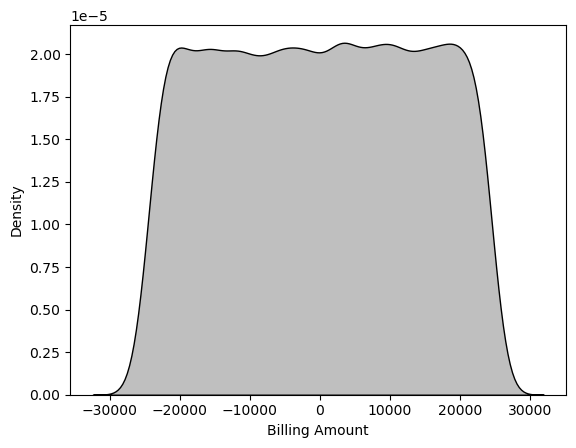

In [148]:
sns.kdeplot(residual, fill=True, color = "black")

### Assumption 4 : Homoscadasticity

<Axes: xlabel='Billing Amount', ylabel='Billing Amount'>

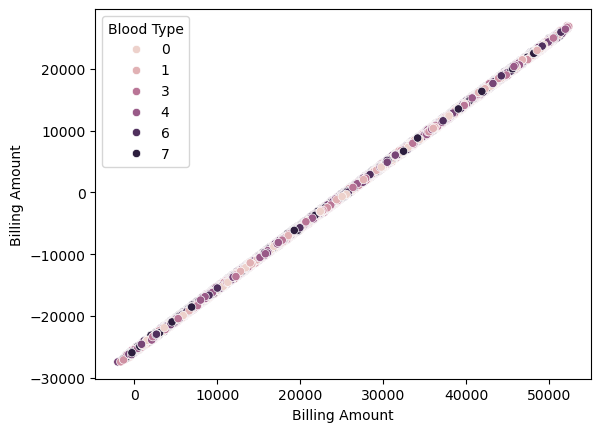

In [149]:
sns.scatterplot(x = ytrain,y = residual, hue=df["Blood Type"])

### Model Evaluation

In [150]:
# model evaluation on training data

mse = mean_squared_error(ytrain, ytrain_predict)
print(f"MSE Mean Squared Error : {mse}")
print("*"*60)

mae = mean_absolute_error(ytrain,ytrain_predict)
print(f"MAE Mean Asolute Error : {mae}")
print("*"*60)

rmse = np.sqrt(mse)
print(f"RMSE Root Mean Squared Error : {rmse}")
print("*"*60)
      
r2score = r2_score(ytrain,ytrain_predict)
print(f"R2 Score : {r2score}")

MSE Mean Squared Error : 202310645.95096514
************************************************************
MAE Mean Asolute Error : 12312.290161234256
************************************************************
RMSE Root Mean Squared Error : 14223.594691601878
************************************************************
R2 Score : 0.00012267279345834492


In [151]:
# model evaluation on testing data

mse = mean_squared_error(ytest, ytest)
print(f"MSE Mean Squared Error : {mse}")
print("*"*60)

mae = mean_absolute_error(ytest, ytest)
print(f"MAE Mean Asolute Error : {mae}")
print("*"*60)

rmse = np.sqrt(mse)
print(f"RMSE Root Mean Squared Error : {rmse}")
print("*"*60)
      
r2score = r2_score(ytest, ytest)
print(f"R2 Score : {r2score}")

MSE Mean Squared Error : 0.0
************************************************************
MAE Mean Asolute Error : 0.0
************************************************************
RMSE Root Mean Squared Error : 0.0
************************************************************
R2 Score : 1.0


### Algorithm 2 : Random Forest

In [152]:
dt = RandomForestRegressor()
rf_reg_model = dt.fit(xtrain, ytrain)
rf_reg_model

RandomForestRegressor()

In [153]:
ytrain_predict = dt_model.predict(xtrain)
ytrain_predict #ypredicted

array([14300.94223, 15641.64232, 33331.27203, ..., 28550.494  ,
       21356.68088, 22898.51664])

In [154]:
ytest_pred = rf_reg_model.predict(xtest)

In [155]:
# model Evaluation for testing
mse = mean_squared_error(ytest, ytest)
print(f"Mean Squared Error = {mse}")
print("-"*60)

mae = mean_absolute_error(ytest, ytest)
print(f"Mean Absolute Error = {mae}")
print("-"*60)

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error = {rmse}")
print("-"*60)

r2score = r2_score(ytest, ytest)
print(f"R2 score = {r2score}")

Mean Squared Error = 0.0
------------------------------------------------------------
Mean Absolute Error = 0.0
------------------------------------------------------------
Root Mean Squared Error = 0.0
------------------------------------------------------------
R2 score = 1.0


In [156]:
ytrain_predict = dt_model.predict(xtrain)

In [157]:
# model evaluation on training data

mse = mean_squared_error(ytrain, ytrain_predict)
print(f"MSE Mean Squared Error : {mse}")
print("*"*60)

mae = mean_absolute_error(ytrain,ytrain_predict)
print(f"MAE Mean Asolute Error : {mae}")
print("*"*60)

rmse = np.sqrt(mse)
print(f"RMSE Root Mean Squared Error : {rmse}")
print("*"*60)
      
r2score = r2_score(ytrain,ytrain_predict)
print(f"R2 Score : {r2score}")

MSE Mean Squared Error : 189562.23127561752
************************************************************
MAE Mean Asolute Error : 16.198308591313815
************************************************************
RMSE Root Mean Squared Error : 435.38744960737847
************************************************************
R2 Score : 0.9990631290001757


In [158]:
rf_reg = RandomForestRegressor()
rf_reg

RandomForestRegressor()

In [159]:
rf_reg_model = rf_reg.fit(xtrain, ytrain)
rf_reg_model

RandomForestRegressor()

In [160]:
ytrain_predict = rf_reg_model.predict(xtrain)
ytrain_predict

array([18114.52168164, 18722.61864588, 29806.95225231, ...,
       29016.2077439 , 19805.73864892, 22079.83764339])

In [161]:
# model evaluation on training data

mse = mean_squared_error(ytrain, ytrain_predict)
print(f"MSE Mean Squared Error : {mse}")
print("*"*60)

mae = mean_absolute_error(ytrain,ytrain_predict)
print(f"MAE Mean Asolute Error : {mae}")
print("*"*60)

rmse = np.sqrt(mse)
print(f"RMSE Root Mean Squared Error : {rmse}")
print("*"*60)
      
r2score = r2_score(ytrain,ytrain_predict)
print(f"R2 Score : {r2score}")

MSE Mean Squared Error : 28166885.048831683
************************************************************
MAE Mean Asolute Error : 4444.276973612806
************************************************************
RMSE Root Mean Squared Error : 5307.248350023926
************************************************************
R2 Score : 0.8607911629861248


In [162]:
ytest_pred = rf_reg_model.predict(xtest)

In [163]:
# model Evaluation for testing
mse = mean_squared_error(ytest, ytest_pred)
print(f"Mean Squared Error = {mse}")
print("-"*60)

mae = mean_absolute_error(ytest, ytest_pred)
print(f"Mean Absolute Error = {mae}")
print("-"*60)

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error = {rmse}")
print("-"*60)

r2score = r2_score(ytest, ytest_pred)
print(f"R2 score = {r2score}")

Mean Squared Error = 197451693.74843556
------------------------------------------------------------
Mean Absolute Error = 11910.974745590507
------------------------------------------------------------
Root Mean Squared Error = 14051.750558148817
------------------------------------------------------------
R2 score = 0.014737691240866546


## save model to pickle file

In [164]:
import pickle

In [165]:
with open("Model.pkl", "wb") as f:
    pickle.dump(lin_reg_model,f)

In [169]:
df1.head(1)

,Age,Gender,Blood Type,Medical Condition,Room Number,Admission Type,Test Results
0,30,1,4,0,328,0,0


In [172]:
def Predictions(Age, Gender,Blood_Type,Medical_Condition,Room_Number,Admission_Typ,Results):
 Data_test=pd.DataFrame({"Age":[Age],
 "Gender":[Gender],
 "Blood Type":[Blood_Type],
 "Medical Condition" : [Medical_Condition],
 "Room Number":[Room_Number],
 "Admission Type":[Admission_Typ],
 "Test Results" : [Results]})
    
 with open ("Model.pkl","rb") as f:
    Model= pickle.load(f)
    print(f" predicted: ₹ {Model.predict(Data_test)[0]}")

In [173]:
Predictions(20, 0, 2, 2, 205, 2, 0)

 predicted: ₹ 25623.563926223287
